In [95]:
! pip install yfinance

Import libraries

In [96]:
import yfinance as yf
from pprint import pprint

Download ticker history OHLCV

In [97]:
TICKER = "SPY"

ticker = yf.Ticker(TICKER)
appl_data = ticker.history(period="30d")
appl_data = appl_data.reset_index(drop=True)

print(appl_data.head(3))

         Open        High         Low       Close     Volume  Dividends  \
0  602.163299  603.139992  600.867672  602.262939   55773500        0.0   
1  601.953994  604.375836  583.924709  584.313416  108248700        0.0   
2  589.376338  591.010851  583.884811  584.133972   85919500        0.0   

   Stock Splits  Capital Gains  
0           0.0            0.0  
1           0.0            0.0  
2           0.0            0.0  


Download ticker history Option chain data

In [98]:
ticker = yf.Ticker(TICKER)

all_data = []

all_options_data = ticker.options

for k, option in enumerate(all_options_data): # all the expirations dates
    option_data = ticker.option_chain(option)
    print(k) #,option_data.calls.columns)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28


In [99]:
option_expiration_date = '2025-02-03' #'2023-07-21'

In [100]:
option_data = ticker.option_chain(option_expiration_date)
option_data

Options(calls=        contractSymbol             lastTradeDate  strike  lastPrice    bid  \
0   SPY250203C00540000 2025-01-31 20:32:22+00:00   540.0      62.00  61.17   
1   SPY250203C00570000 2025-01-31 21:14:47+00:00   570.0      31.72  31.18   
2   SPY250203C00580000 2025-01-31 21:13:39+00:00   580.0      21.61  21.17   
3   SPY250203C00585000 2025-01-31 21:14:16+00:00   585.0      16.52  16.21   
4   SPY250203C00586000 2025-01-31 14:37:08+00:00   586.0      21.45  15.22   
5   SPY250203C00587000 2025-01-31 20:59:22+00:00   587.0      15.46  14.25   
6   SPY250203C00588000 2025-01-31 21:09:40+00:00   588.0      14.02  13.28   
7   SPY250203C00589000 2025-01-31 20:11:33+00:00   589.0      13.09  12.32   
8   SPY250203C00590000 2025-01-31 20:51:49+00:00   590.0      14.00  11.85   
9   SPY250203C00591000 2025-01-31 21:07:08+00:00   591.0      11.20  10.91   
10  SPY250203C00592000 2025-01-31 21:02:46+00:00   592.0      10.35   9.97   
11  SPY250203C00593000 2025-01-31 20:59:28+00:00  

In [101]:
option_data.puts.head()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,SPY250203P00410000,2025-01-31 15:37:39+00:00,410.0,0.01,0.0,0.01,0.0,0.0,100.0,50,1.250004,False,REGULAR,USD
1,SPY250203P00415000,2025-01-27 20:27:57+00:00,415.0,0.01,0.0,0.01,0.0,0.0,26.0,30,1.218754,False,REGULAR,USD
2,SPY250203P00435000,2025-01-28 14:46:11+00:00,435.0,0.01,0.0,0.01,0.0,0.0,5.0,95,1.062505,False,REGULAR,USD
3,SPY250203P00440000,2025-01-28 20:32:26+00:00,440.0,0.01,0.0,0.01,0.0,0.0,103.0,239,1.031255,False,REGULAR,USD
4,SPY250203P00445000,2025-01-23 19:27:23+00:00,445.0,0.02,0.0,0.01,0.0,0.0,NaN,59,0.984375,False,REGULAR,USD


(240.7280029296875, 1083.2760131835937)

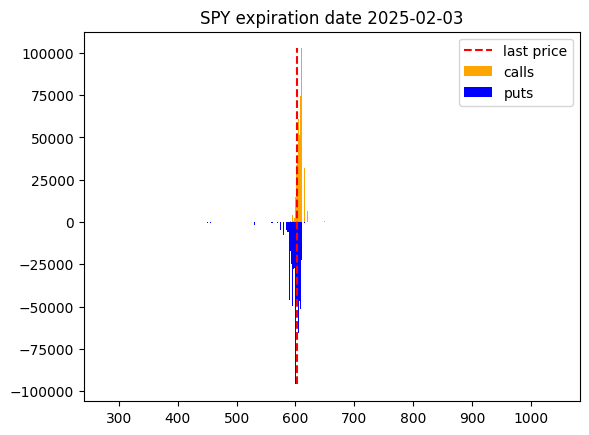

In [102]:
import matplotlib.pyplot as plt
import yfinance as yf
from pprint import pprint

plt.title( f"{TICKER} expiration date {option_expiration_date}" )

plt.bar( option_data.calls['strike'] , option_data.calls['volume'] , width = 2 , align = 'center' , color = 'orange' )
plt.bar( option_data.puts['strike'] , -option_data.puts['volume'] , width = 2 , align = 'center' , color = 'blue' )

plt.vlines( x = appl_data['Close'].iloc[-1],
           ymin = min(-option_data.puts['volume']) ,
           ymax = max(option_data.calls['volume']) ,
           linestyles = '--',
           colors = 'red' )

plt.legend( [ 'last price' , 'calls' , 'puts' ] )
plt.xlim([appl_data['Close'].iloc[-1]*0.4, appl_data['Close'].iloc[-1]*1.8])


(240.7280029296875, 902.7300109863281)

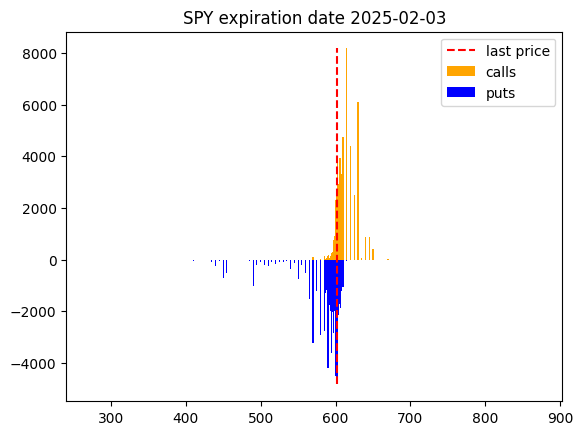

In [103]:
plt.title(f"{TICKER} expiration date {option_expiration_date}")

plt.bar(option_data.calls['strike'], option_data.calls['openInterest'],width=1.5,align='center',color='orange')
plt.bar(option_data.puts['strike'], -option_data.puts['openInterest'],width=1.5,align='center',color='blue')

plt.vlines( x = appl_data['Close'].iloc[-1],ymin=min(-option_data.puts['openInterest']) ,
            ymax=max(option_data.calls['openInterest']) ,
            linestyles='--',
            colors='red')

plt.legend( [ 'last price' , 'calls' , 'puts' ] )

plt.xlim([appl_data['Close'].iloc[-1]*0.4, appl_data['Close'].iloc[-1]*1.5])

In [104]:
import yfinance as yf

aapl = yf.Ticker(TICKER)
expiration_date = aapl.options[0]
options_chain = aapl.option_chain(expiration_date)
options_chain

#options_chain.calls.to_csv("aapl_calls.csv")
#options_chain.puts.to_csv("aapl_puts.csv")

Options(calls=        contractSymbol             lastTradeDate  strike  lastPrice    bid  \
0   SPY250203C00540000 2025-01-31 20:32:22+00:00   540.0      62.00  61.17   
1   SPY250203C00570000 2025-01-31 21:14:47+00:00   570.0      31.72  31.18   
2   SPY250203C00580000 2025-01-31 21:13:39+00:00   580.0      21.61  21.17   
3   SPY250203C00585000 2025-01-31 21:14:16+00:00   585.0      16.52  16.21   
4   SPY250203C00586000 2025-01-31 14:37:08+00:00   586.0      21.45  15.22   
5   SPY250203C00587000 2025-01-31 20:59:22+00:00   587.0      15.46  14.25   
6   SPY250203C00588000 2025-01-31 21:09:40+00:00   588.0      14.02  13.28   
7   SPY250203C00589000 2025-01-31 20:11:33+00:00   589.0      13.09  12.32   
8   SPY250203C00590000 2025-01-31 20:51:49+00:00   590.0      14.00  11.85   
9   SPY250203C00591000 2025-01-31 21:07:08+00:00   591.0      11.20  10.91   
10  SPY250203C00592000 2025-01-31 21:02:46+00:00   592.0      10.35   9.97   
11  SPY250203C00593000 2025-01-31 20:59:28+00:00  

<ipython-input-105-a03dffedfdaa>:10: RuntimeWarning: invalid value encountered in sqrt
  d1 = (np.log(S/K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
<ipython-input-105-a03dffedfdaa>:11: RuntimeWarning: invalid value encountered in sqrt
  gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))
<ipython-input-105-a03dffedfdaa>:10: RuntimeWarning: invalid value encountered in sqrt
  d1 = (np.log(S/K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
<ipython-input-105-a03dffedfdaa>:11: RuntimeWarning: invalid value encountered in sqrt
  gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))


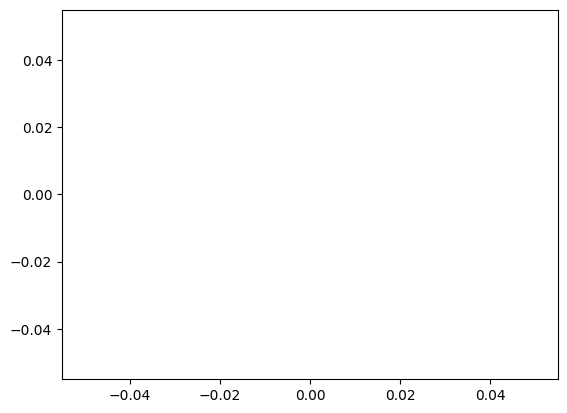

In [105]:
import yfinance as yf
import pandas as pd
import numpy as np
from scipy.stats import norm
import datetime
import matplotlib.pyplot as plt


def bs_gamma(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))
    return gamma

aapl = yf.Ticker(TICKER)
EXPIRATION_DATE = option_expiration_date
opt = aapl.option_chain(EXPIRATION_DATE)

df = pd.DataFrame(opt.calls)
specific_date = datetime.date(2023, 6, 2)
today = datetime.date.today()
difference = specific_date - today
df['Gamma'] = bs_gamma(df['lastPrice'], df['strike'], difference.days / 365, 0.01, df['impliedVolatility'])
df['level_call'] = df['Gamma'] * df['openInterest']

df2 = pd.DataFrame(opt.puts)
specific_date = datetime.date(2023, 6, 2)
today = datetime.date.today()
difference = specific_date - today
df2['Gamma'] = bs_gamma(df2['lastPrice'], df2['strike'], difference.days / 365, 0.01, df2['impliedVolatility'])
df2['level_puts'] = df2['Gamma'] * df2['openInterest']


plt.plot(df['strike'],df["level_call"],color='green')
plt.plot(df2['strike'],df2["level_puts"],color='red')

<BarContainer object of 57 artists>

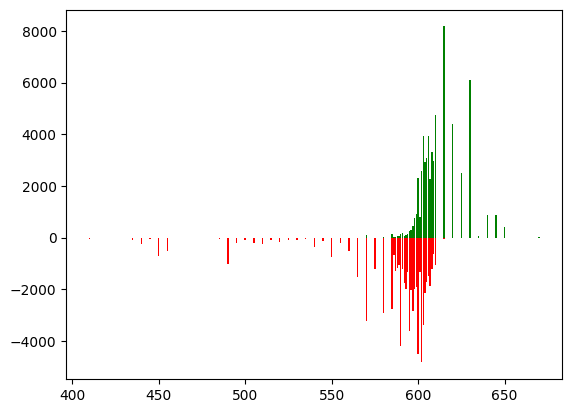

In [106]:
plt.bar(df['strike'],df["openInterest"],color='green')
plt.bar(df2['strike'],-df2["openInterest"],color='red')

<BarContainer object of 57 artists>

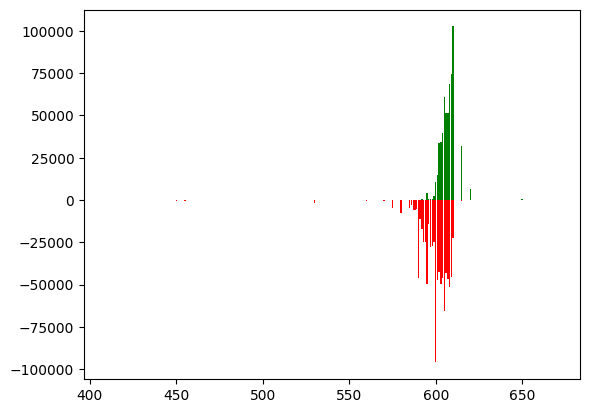

In [107]:
plt.bar(df['strike'],df["volume"],color='green')
plt.bar(df2['strike'],-df2["volume"],color='red')

In [108]:
import yfinance as yf
from scipy.stats import norm
import numpy as np

aapl = yf.Ticker("AAPL")
aapl_data = aapl.history(period="90d")
aapl_close = aapl_data['Close']


def black_scholes_call_gamma(S, K, T, r, sigma):
    """
    S is the stock price
    K is the strike price
    T is the time to expiration
    r is the risk-free interest rate
    Sigma is the volatility of the stock.
    """
    d1 = (np.log(S/K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))
    return gamma


# sigma calculation
returns = aapl_data['Close'].pct_change()
sigma = np.sqrt(252) * np.std(returns)
z_score = norm.ppf(0.975)
call_sigma = z_score * sigma

# data calculation
stock_price = aapl_close[-1]
time_decay = 30 / 365
risk_free_rate = 0.01


df['gamma'] = None
df['GEX'] = None

df2['gamma'] = None
df2['GEX'] = None

for index, strike_price in df['strike'].items():
    call_gamma = black_scholes_call_gamma(S = stock_price, K = strike_price, T= time_decay, r = risk_free_rate, sigma = call_sigma)
    df.loc[index,'gamma'] = call_gamma
    df.loc[index,'GEX'] = call_gamma * df.loc[index,'openInterest']

for index, strike_price in df2['strike'].items():
    puts_gamma = black_scholes_call_gamma(S = stock_price, K = strike_price, T= time_decay, r = risk_free_rate, sigma = call_sigma)
    df2.loc[index,'gamma'] = puts_gamma
    df2.loc[index,'GEX'] = puts_gamma * df2.loc[index,'openInterest']

merged_df = pd.merge(df, df2, on='strike')


df.head()

<ipython-input-108-1564699306d2>:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stock_price = aapl_close[-1]


,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,Gamma,level_call,gamma,GEX
0,SPY250203C00540000,2025-01-31 20:32:22+00:00,540.0,62.00,61.17,62.38,-2.339996,-3.636923,2,2,0.680667,True,REGULAR,USD,NaN,NaN,0.0,0.0
1,SPY250203C00570000,2025-01-31 21:14:47+00:00,570.0,31.72,31.18,32.37,-1.539999,-4.630184,79,90,0.388678,True,REGULAR,USD,NaN,NaN,0.0,0.0
2,SPY250203C00580000,2025-01-31 21:13:39+00:00,580.0,21.61,21.17,22.39,-0.639999,-2.876402,37,35,0.290779,True,REGULAR,USD,NaN,NaN,0.0,0.0
3,SPY250203C00585000,2025-01-31 21:14:16+00:00,585.0,16.52,16.21,17.41,-3.619999,-17.974176,36,153,0.240486,True,REGULAR,USD,NaN,NaN,0.0,0.0
4,SPY250203C00586000,2025-01-31 14:37:08+00:00,586.0,21.45,15.22,16.46,1.450001,7.250003,1,40,0.234993,True,REGULAR,USD,NaN,NaN,0.0,0.0


In [109]:
merged_df = pd.merge(df, df2, on='strike')
merged_df.head()

,contractSymbol_x,lastTradeDate_x,strike,lastPrice_x,bid_x,ask_x,change_x,percentChange_x,volume_x,openInterest_x,...,volume_y,openInterest_y,impliedVolatility_y,inTheMoney_y,contractSize_y,currency_y,Gamma_y,level_puts,gamma_y,GEX_y
0,SPY250203C00540000,2025-01-31 20:32:22+00:00,540.0,62.00,61.17,62.38,-2.339996,-3.636923,2,2,...,17.0,384,0.433599,False,REGULAR,USD,NaN,NaN,0.0,0.0
1,SPY250203C00570000,2025-01-31 21:14:47+00:00,570.0,31.72,31.18,32.37,-1.539999,-4.630184,79,90,...,869.0,3226,0.234383,False,REGULAR,USD,NaN,NaN,0.0,0.0
2,SPY250203C00580000,2025-01-31 21:13:39+00:00,580.0,21.61,21.17,22.39,-0.639999,-2.876402,37,35,...,7876.0,2904,0.180672,False,REGULAR,USD,NaN,NaN,0.0,0.0
3,SPY250203C00585000,2025-01-31 21:14:16+00:00,585.0,16.52,16.21,17.41,-3.619999,-17.974176,36,153,...,4970.0,2775,0.155770,False,REGULAR,USD,NaN,NaN,0.0,0.0
4,SPY250203C00586000,2025-01-31 14:37:08+00:00,586.0,21.45,15.22,16.46,1.450001,7.250003,1,40,...,2859.0,683,0.154305,False,REGULAR,USD,NaN,NaN,0.0,0.0


(421.2740051269531, 782.3660095214844)

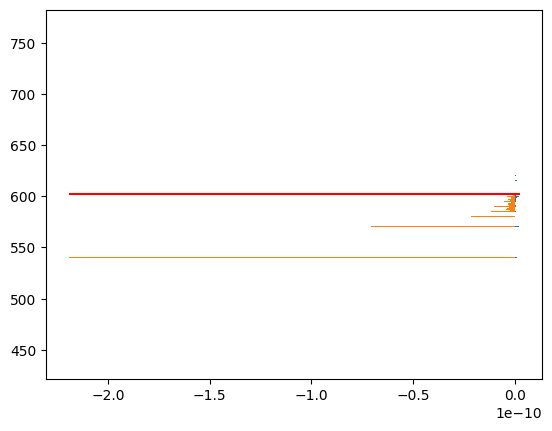

In [110]:
plt.barh(merged_df['strike'], merged_df['GEX_x'])
plt.barh(merged_df['strike'], -merged_df['GEX_y'])

plt.hlines(appl_data['Close'].iloc[-1],xmin = min(-merged_df['GEX_y']), xmax = max(merged_df['GEX_x']),colors='red')
plt.ylim([appl_data['Close'].iloc[-1]*0.7, appl_data['Close'].iloc[-1]*1.3])

In [111]:
merged_df['GEX'] = merged_df['GEX_x'] - merged_df['GEX_y']

In [112]:
#plt.barh(merged_df['strike'], merged_df['GEX'] )
#plt.plot(aapl_data.index- len(aapl_data.index) , aapl_data['Close'],color='black')
#plt.hlines(appl_data['Close'].iloc[-1],xmin = min(-merged_df['GEX']), xmax = max(merged_df['GEX']),colors='red',linestyles='--')
#plt.ylim([appl_data['Close'].iloc[-1]*0.7, appl_data['Close'].iloc[-1]*1.3])
#plt.xlim([min(merged_df['GEX']),  max(merged_df['GEX'])])

In [113]:
# fig, ax = plt.subplots()
# fig.set_figheight(15)
# fig.set_figwidth(15)

# ax.barh(merged_df['strike'], merged_df['GEX'] )
# ax.plot(aapl_data.index- len(aapl_data.index) , aapl_data['Close'],color='black')
# ax.hlines(appl_data['Close'].iloc[-1],xmin = min(-merged_df['GEX']), xmax = max(merged_df['GEX']),colors='red',linestyles='--')

# ax.set_title(f"{TICKER} expiration date {option_expiration_date}")

# ax.legend( [ 'GEX Levels','last price' ] )

# for i, value in enumerate(merged_df['strike']):
#     side = 'right'
#     if merged_df['GEX'].iloc[i]>0: side = 'left'
#     if merged_df['GEX'].iloc[i]>0.5 or merged_df['GEX'].iloc[i]< -0.5:
#         ax.text(merged_df['GEX'].iloc[i], merged_df['strike'].iloc[i], str(round(merged_df['strike'].iloc[i])), ha=side, va='center')

# ax.text(0,appl_data['Close'].iloc[-1], str(round(appl_data['Close'].iloc[-1])), ha='left', va='center',fontsize=13)

# ax.text(100,merged_df['strike'].mean(), str(f"GEX levels \n {TICKER} expiration date {option_expiration_date} "), ha='left', va='center',fontsize=13,color='green', rotation='horizontal')

# ax.set_xlim([min(merged_df['GEX']),  max(merged_df['GEX'])])
# ax.set_ylim(bottom=appl_data['Close'].iloc[-1]*0.6,top=appl_data['Close'].iloc[-1]*1.4)

 Trading with SPDR S&P 500 ETF Trust
Index(['contractSymbol_x', 'lastTradeDate_x', 'strike', 'lastPrice_x', 'bid_x',
       'ask_x', 'change_x', 'percentChange_x', 'volume_x', 'openInterest_x',
       'impliedVolatility_x', 'inTheMoney_x', 'contractSize_x', 'currency_x',
       'gamma_x', 'GEX_x', 'contractSymbol_y', 'lastTradeDate_y',
       'lastPrice_y', 'bid_y', 'ask_y', 'change_y', 'percentChange_y',
       'volume_y', 'openInterest_y', 'impliedVolatility_y', 'inTheMoney_y',
       'contractSize_y', 'currency_y', 'gamma_y', 'GEX_y', 'GEX'],
      dtype='object')
strike 590.0 -36.42197099627416 
strike 595.0 -31.289026573774677 
strike 580.0 -23.04037503004903 
strike 597.0 -22.435555122365244 
strike 585.0 -22.424260526921763 
strike 602.0 -21.300126159431635 
strike 570.0 -21.17109473408359 
strike 600.0 -20.582288715068298 
strike 593.0 -17.33409508485919 
strike 596.0 -16.421706065337112 
strike 615.0 74.33154671209141 
strike 620.0 38.69542504991944 
strike 610.0 34.4270042909

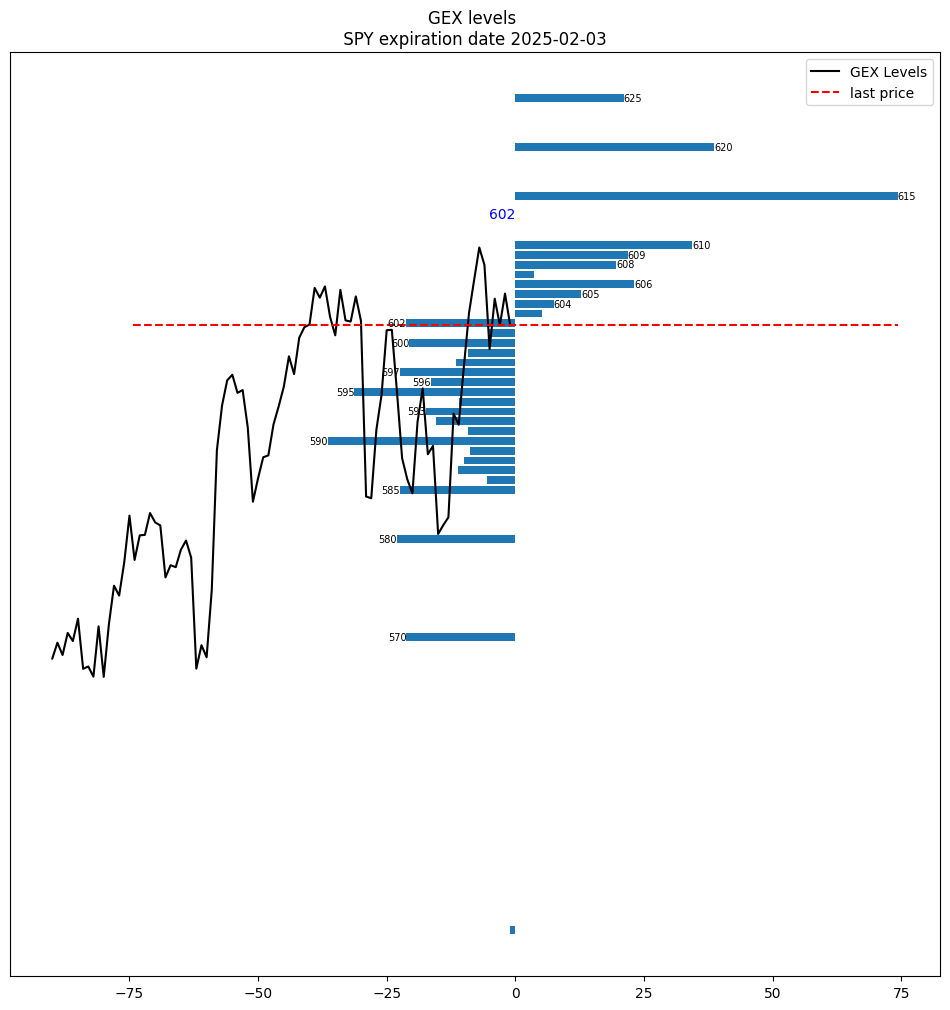

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import find_peaks
from scipy.stats import norm

import yfinance as yf


def black_scholes_gamma(S, K, T, r, sigma):
    """
    S is the stock price
    K is the strike price
    T is the time to expiration
    r is the risk-free interest rate
    Sigma is the volatility of the stock.
    """
    d1 = (np.log(S/K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))
    return gamma


def get_gex_dataframe(ticker="AAPL", expiration_date = '2025-02-03', period="30d"):

    ticker_ = yf.Ticker(ticker)
    data = ticker_.history(period=period)
    data = data.reset_index(drop=True)

    try:
        ticker_info = ticker_.info
        real_name = ticker_info["longName"]
        print(f" Trading with {real_name}")
    except:
        pass

    option_data = ticker_.option_chain(expiration_date)

    df = pd.DataFrame(option_data.calls)
    df2 = pd.DataFrame(option_data.puts)

    # sigma calculation
    returns = data['Close'].pct_change()
    sigma = np.sqrt(252) * np.std(returns)
    z_score = norm.ppf(0.975)
    call_sigma = z_score * sigma

    # data calculation
    time_decay = 30 / 365
    risk_free_rate = 0.01

    stock_price = data['Close'].iloc[-1]

    df['gamma'] = None
    df['GEX'] = None

    df2['gamma'] = None
    df2['GEX'] = None

    for index, strike_price in df['strike'].items():
        call_gamma = black_scholes_gamma(S = stock_price, K = strike_price, T= time_decay, r = risk_free_rate, sigma = call_sigma)
        df.loc[index,'gamma'] = call_gamma
        df.loc[index,'GEX'] = call_gamma * df.loc[index,'openInterest']

    for index, strike_price in df2['strike'].items():
        puts_gamma = black_scholes_gamma(S = stock_price, K = strike_price, T= time_decay, r = risk_free_rate, sigma = call_sigma)
        df2.loc[index,'gamma'] = puts_gamma
        df2.loc[index,'GEX'] = puts_gamma * df2.loc[index,'openInterest']

    merged_df = pd.merge(df, df2, on='strike')
    merged_df['GEX'] = merged_df['GEX_x'] - merged_df['GEX_y']
    return data, merged_df



def final_plot(asset_data, merged_df,title='title',show_strike=False,set_boundries=False):
    fig, ax = plt.subplots()
    fig.set_figheight(12)
    fig.set_figwidth(12)

    ax.barh(merged_df['strike'], merged_df['GEX'] )
    ax.plot(asset_data.index- len(asset_data.index) , asset_data['Close'],color='black')
    ax.hlines(asset_data['Close'].iloc[-1],xmin = min(-merged_df['GEX']), xmax = max(merged_df['GEX']),colors='red',linestyles='--')

    ax.set_title(title)

    ax.legend( [ 'GEX Levels','last price' ] )

    merged_df['GEX'] = merged_df['GEX'].astype(float)

    df = pd.DataFrame(merged_df, columns=['GEX'])
    most_extreme_values = pd.concat([df.nsmallest(10, 'GEX'), df.nlargest(10, 'GEX')])

    for k,v in zip(most_extreme_values.index, most_extreme_values.values):
        print(f"strike {merged_df['strike'].iloc[k]} {v[0]} ")

    peaks_strikes = merged_df['strike'].iloc[most_extreme_values.index].to_list()

    if show_strike:
        for i, value in enumerate(merged_df['strike']):
            if (merged_df['GEX'].iloc[i]>max(merged_df['GEX'] / 10 ) or merged_df['GEX'].iloc[i]< -max(merged_df['GEX'] / 10 )) and value in peaks_strikes:

                side = 'right'
                if merged_df['GEX'].iloc[i]>0:
                    side = 'left'

                ax.text(merged_df['GEX'].iloc[i],
                        merged_df['strike'].iloc[i],
                        str(round(merged_df['strike'].iloc[i])),
                        ha=side,
                        va='center',
                        fontsize=7,
                        )

    ax.text(0,asset_data['Close'].iloc[-1]*1.02,
            str(round(asset_data['Close'].iloc[-1])),
            ha='right',
            va='top',
            color='blue',
            fontsize=10)

    #ax.text(100,merged_df['strike'].mean(), str(title), ha='left', va='center',fontsize=13,color='green', rotation='horizontal')

    if set_boundries:
        ax.set_xlim([min(merged_df['GEX'])*1.3,  max(merged_df['GEX'])*1.1])
        ax.set_ylim(bottom=asset_data['Close'].iloc[-1]*0.5,top=asset_data['Close'].iloc[-1]*1.3)
    ax.set_yticks([])


tickers_SNP500 = ['MA','XOM','HD','V','META','JPM','KO','GOOGL','BRK.B','MSFT','NVDA','AAPL','SPY','TSLA']
tickers_yahoofinance = ['SPY','GOOGL','BRK.B','MSFT','NVDA','AAPL','SPY','TSLA']
tickers_ninjatrader = ['SPY']


# ONLY FUTURES & OPTIONS compatible with yahoo finance
TICKER = "SPY"

period_asset_price="max"
period_asset_price="90d"

avaiable_expiration_dates = "[2025-02-03, 2025-02-04, 2025-02-05, 2025-02-06, 2025-02-07, 2025-02-14, 2025-02-21, 2025-02-28, 2025-03-07, 2025-03-21, 2025-03-31, 2025-04-17, 2025-04-30, 2025-05-16, 2025-05-30, 2025-06-20, 2025-06-30, 2025-07-18, 2025-08-15, 2025-09-19, 2025-09-30, 2025-12-19, 2025-12-31, 2026-01-16, 2026-03-20, 2026-06-18, 2026-12-18, 2027-01-15, 2027-12-17]"
avaiable_expiration_dates = [i.replace('[','').replace(']','').replace(' ','') for i in avaiable_expiration_dates.split(',')]

expiration_date = avaiable_expiration_dates[4]
expiration_date = "2025-02-03"




asset_data , merged_df = get_gex_dataframe( ticker = TICKER, expiration_date = expiration_date , period=period_asset_price )

print(merged_df.columns)

final_plot(asset_data, merged_df,
          show_strike=True,
          set_boundries=False,
          title=f"GEX levels \n {TICKER} expiration date {expiration_date} ")


Delta Neutral Hedging

In [115]:
!pip install py_vollib
import yfinance as yf
from py_vollib.black_scholes.implied_volatility import implied_volatility
from py_vollib.black_scholes.greeks.analytical import delta


# Define the ticker symbol
ticker_symbol = "SPY"

# Fetch the option chain data for the ticker symbol
option_chain = yf.Ticker(ticker_symbol).option_chain(option_expiration_date)

# Get the option chain DataFrame
options = option_chain.calls

# Get the option chain DataFrames for calls and puts
calls = option_chain.calls
puts = option_chain.puts

# Calculate delta for each call option
calls["Delta"] = calls.apply(
    lambda row: delta("c", row["strike"], row["lastPrice"], 0.05 , 5 / 365, row["impliedVolatility"]),
    axis=1
)

# Calculate delta for each put option
puts["Delta"] = puts.apply(
    lambda row: delta("p", row["strike"], row["lastPrice"], 0.05, 5 / 365, row["impliedVolatility"]),
    axis=1
)

# Concatenate calls and puts into a single DataFrame
options = pd.concat([calls, puts])

# Sort the options based on delta
sorted_options = options.sort_values("Delta")

# Find the option with delta closest to zero
delta_neutral_option = sorted_options.iloc[abs(sorted_options["Delta"]).idxmin()]

# Get the strike price for the delta-neutral option
delta_neutral_strike = delta_neutral_option["strike"]

print("Delta Neutral Strike Price:", delta_neutral_strike)


Delta Neutral Strike Price: 555.0


In [116]:
merged_df['GEX']


,GEX
0,-1.013431
1,-21.171095
2,-23.040375
3,-22.424261
4,-5.558460
5,-11.116400
6,-9.997156
7,-8.859051
8,-36.421971
9,-9.282029


In [117]:
# merged_df['strike'].iloc[most_extreme_values.index]

In [118]:
# 410.0 in merged_df['strike'].iloc[most_extreme_values.index].to_list()

In [119]:
# GET MOST EXTREMES VALUES
merged_df['GEX'] = merged_df['GEX'].astype(float)

df = pd.DataFrame(merged_df, columns=['GEX'])
most_extreme_values = pd.concat([df.nsmallest(5, 'GEX'), df.nlargest(5, 'GEX')])
most_extreme_values.index
#ost_extreme_values.values

Index([8, 13, 2, 15, 3, 29, 30, 28, 24, 27], dtype='int64')

In [120]:
most_extreme_values

,GEX
8,-36.421971
13,-31.289027
2,-23.040375
15,-22.435555
3,-22.424261
29,74.331547
30,38.695425
28,34.427004
24,23.106338
27,21.855039


In [121]:
for k,v in zip(most_extreme_values.index,most_extreme_values.values):
    #print(k,v[0])
    print(f"strike {merged_df['strike'].iloc[k]} {v[0]} ")


strike 590.0 -36.42197099627416 
strike 595.0 -31.289026573774677 
strike 580.0 -23.04037503004903 
strike 597.0 -22.435555122365244 
strike 585.0 -22.424260526921763 
strike 615.0 74.33154671209141 
strike 620.0 38.69542504991944 
strike 610.0 34.42700429092766 
strike 606.0 23.10633825111188 
strike 609.0 21.85503879415149 


In [122]:
peaks, _ = find_peaks(merged_df['GEX'] , distance = 4 )

for i in peaks:

    print(merged_df['GEX'].iloc[i])
    #print(merged_df['strike'].iloc[i], merged_df['GEX'].iloc[i])

-5.5584603939797494
-9.28202880421852
-16.421706065337112
-5.197670909782975
23.10633825111188
74.33154671209141


In [123]:
# DOWNLAOD DATA

# Set the ticker symbol for the desired asset
ticker_symbol = "ES=F"

# Set the start and end dates for the data
start_date = "2022-01-01"
end_date = "2022-12-31"

# Download the data from Yahoo Finance
data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Display the downloaded data
print(data)

[*********************100%***********************]  1 of 1 completed

Price         Close     High      Low     Open   Volume
Ticker         ES=F     ES=F     ES=F     ES=F     ES=F
Date                                                   
2022-01-03  4786.00  4791.25  4747.50  4771.00  1322362
2022-01-04  4784.25  4808.25  4764.50  4785.25  1392809
2022-01-05  4692.50  4788.25  4689.50  4783.50  1856376
2022-01-06  4687.50  4715.75  4662.00  4692.00  1862918
2022-01-07  4667.75  4705.75  4653.75  4695.00  1618440
...             ...      ...      ...      ...      ...
2022-12-23  3869.75  3872.50  3821.25  3850.00  1374913
2022-12-27  3855.00  3900.50  3837.25  3878.00  1006414
2022-12-28  3807.50  3875.00  3804.50  3858.00  1282810
2022-12-29  3871.75  3882.75  3806.25  3811.00  1146984
2022-12-30  3861.00  3871.00  3821.50  3869.75  1401810

[251 rows x 5 columns]
